# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform

In [2]:
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a +(b - a) * x
print(randoms)

[2.1252271  2.6409279  2.74287533 2.48845097 2.55946627 2.28832496
 2.14521844 2.26284142 2.88358481 2.08234385]


In [3]:
uniform.rvs(size=10)

array([0.07237851, 0.23084527, 0.63821132, 0.10855578, 0.07900441,
       0.97567896, 0.94648727, 0.80516001, 0.08084122, 0.02730785])

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

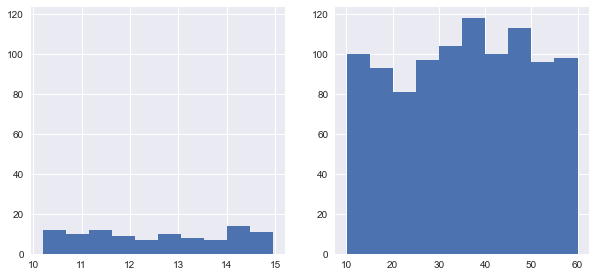

In [4]:
import functions as f
# plotting(function, list_of_parameters, bins)
# list_of_parameters = [bottom, ceiling, count]
f.plotting(f.random_uniform, [10,15,100],  [10,60,1000], 10)

How are the two distributions different?

There are two main differents:
- Firstly, the second sample is larger than the first one (i.e. 1,000 vs 100). 
- Secondly, the range of outputs are also bit differents; actually, the secound plot has a larger range [10,60] in comparison with [10,15] of the first plot.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

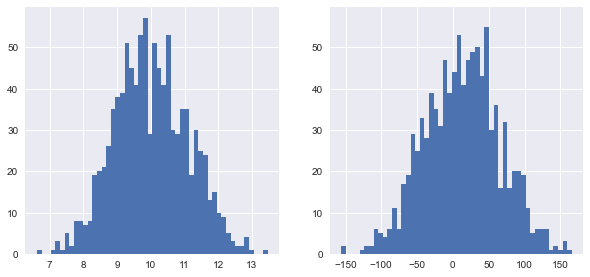

In [5]:
# plotting(function, list_of_parameters, bins)
# list_of_parameters = [mean, std, count]
f.plotting(f.random_normal,[10,1,1000],[10,50,1000],50)

How are the two distributions different?

Basically, while they both have the same mean and size, they differ in the outputs and in the dispertion of the sample points. In other words, they are centered in different point and one has (the second plot) a wide range than the firts one.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [6]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


In [7]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

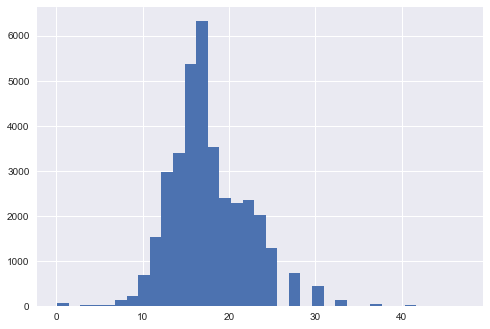

In [8]:
plt.hist(vehicles['Fuel Barrels/Year'], bins=35);

2. CO2 Emission Grams/Mile 

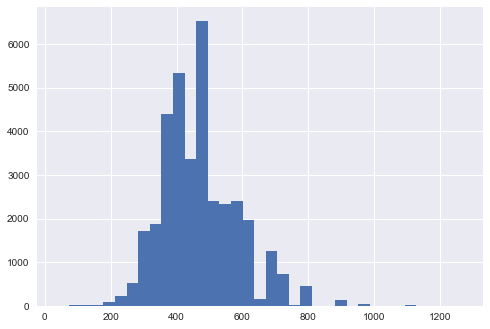

In [9]:
plt.hist(vehicles['CO2 Emission Grams/Mile'], bins=35);

3. Combined MPG

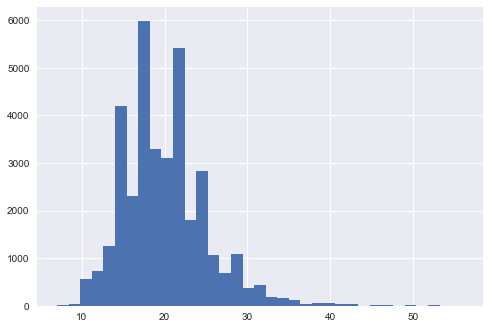

In [10]:
plt.hist(vehicles['Combined MPG'], bins=35);

Which one(s) of the variables are nearly normally distributed? How do you know?

In [11]:
import scipy.stats as ss

distributions = [
    vehicles['Fuel Barrels/Year'],
    vehicles['CO2 Emission Grams/Mile'],
    vehicles['Combined MPG']
]

for dist in distributions:
    print(ss.kstest(dist, ss.norm.pdf, args=(0,10)))

KstestResult(statistic=0.9999993886026357, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.9999999938173795, pvalue=0.0)


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

How are the two distributions different?

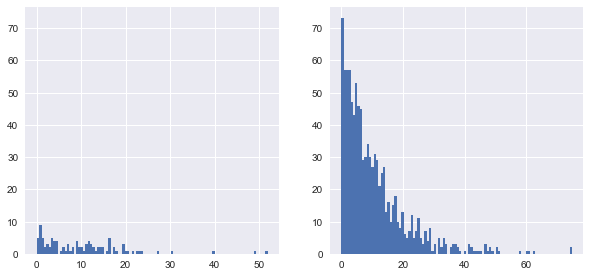

In [12]:
f.plotting(f.random_expo,[10,100],[10,1000],100)

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [13]:
x = np.linspace(0,20,1000)
bank = ss.expon.cdf(x, scale=10)

In [14]:
# I came up with two ways
# to access to P(x<15)
# This's the first one:
df = pd.DataFrame({'x':x, 'y':bank})
df[df.x < 15].iloc[-1:].y

749    0.776758
Name: y, dtype: float64

In [15]:
# This's the second one:
itemindex = np.where(x < 15)
bank[itemindex[-1][-1]]

0.7767581351429397

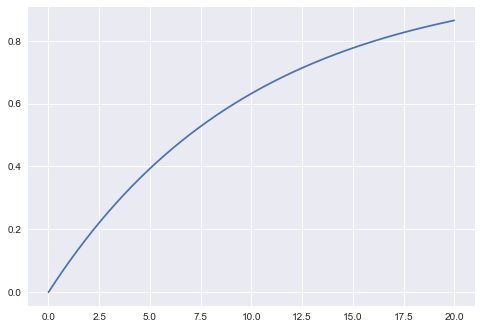

In [16]:
plt.plot(x, bank);

What is the probability that the customer will spend more than 15 minutes

In [17]:
itemindex = np.where(x > 15)
bank[itemindex[-1][-1]]

0.8646647167633873